In [1]:
import nltk

In [2]:
#for downloading all the corpus
#installed...do not run it agian..run it once
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
import sys
!{sys.executable} -m pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\ML course\NLP\seat.csv' ,  encoding = "ISO-8859-1")

In [4]:
df.head()

airline_name                                     link  \
0            aegean-airlines            /seat-reviews/aegean-airlines   
1            aegean-airlines            /seat-reviews/aegean-airlines   
2                 aer-lingus                 /seat-reviews/aer-lingus   
3                 aer-lingus                 /seat-reviews/aer-lingus   
4  aeroflot-russian-airlines  /seat-reviews/aeroflot-russian-airlines   

                                       title                    author  \
0            Aegean Airlines customer review               Jay Simpson   
1            Aegean Airlines customer review              Paul Staples   
2                 Aer Lingus customer review                 L Pulliam   
3                 Aer Lingus customer review                   D Brose   
4  Aeroflot Russian Airlines customer review  Konstantinos Grimpilakos   

   author_country        date  \
0  United Kingdom  2015-07-20   
1  United Kingdom  2013-01-21   
2   United States  2015-07-07   
3   United States  2010-10-22   
4          Greece  2015-08-02   

                                             content        aircraft  \
0  LHR to Larnaca return. Plane was clean and in ...        A320-200   
1  For a short haul airline the seats are very go...     AIRBUS A320   
2  The seats are a bit tight but bearable. If you...            A330   
3  Appeared new. Good PTV entertainment. Seats ha...     Airbus A330   
4  Boeing 737-800 seats from Athens to Moscow are...  Boeing 737-800   

  seat_layout  date_flown  ...  type_traveller overall_rating  \
0         3x3  19-07-2015  ...    Solo Leisure           10.0   
1         3x3         NaN  ...             NaN            9.0   
2       2x4x2  06-07-2015  ...  Couple Leisure            6.0   
3       2x4x2         NaN  ...             NaN            5.0   
4         3x3  01-07-2015  ...        Business            1.0   

   seat_legroom_rating  seat_recline_rating  seat_width_rating  \
0                    4                    4                  4   
1                    4                    4                  4   
2                    3                    3                  3   
3                    2                    3                  3   
4                    1                    1                  1   

   aisle_space_rating  viewing_tv_rating  power_supply_rating  \
0                   5                4.0                  NaN   
1                   4                4.0                  NaN   
2                   3                3.0                  3.0   
3                   3                4.0                  NaN   
4                   2                1.0                  5.0   

   seat_storage_rating  recommended  
0                  4.0            1  
1                  NaN            1  
2                  3.0            1  
3                  NaN            0  
4                  1.0            1  

[5 rows x 21 columns]

In [5]:
df = df[['content','recommended']]

In [6]:
df.head()

content  recommended
0  LHR to Larnaca return. Plane was clean and in ...            1
1  For a short haul airline the seats are very go...            1
2  The seats are a bit tight but bearable. If you...            1
3  Appeared new. Good PTV entertainment. Seats ha...            0
4  Boeing 737-800 seats from Athens to Moscow are...            1

In [18]:
#Input feature
X = df[['content']]
X.columns = ['Reviews']
X.describe()

Reviews
count                                                1258
unique                                               1246
top     Seat 16D Newark to Dusseldorf Germany and on t...
freq                                                    2

In [19]:
#target variable
y= df[['recommended']]
y.columns = ['Recommended']
y.describe()

Recommended
count   1258.00000
mean       0.36407
std        0.48136
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000

# Text preprocessing on reviews

In [11]:
'''1.replacing contractions i.e shortform in the words are replaced by thier long forms.Using dictinary of contractions from internet..i'll-i will '''
#other words can also be added in this dictinary
contractions = { 
"h." :"hours", "hr." : "hours" , "hr" : "hours",
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [20]:
reviews = X['Reviews'].tolist()
print(reviews)

['LHR to Larnaca return. Plane was clean and in good condition. Drinks were served throughout both flights. Food was good. Would definitely not hesitate to use this airline for European trips.', 'For a short haul airline the seats are very good. I find the seats comfortable and plenty of leg room!', "The seats are a bit tight but bearable. If you're courteous to others they will be courteous to you. Everyone is in the same seat so ask your neighbor, be it front or back if any issues come up and all should be good!", 'Appeared new. Good PTV entertainment. Seats have tight width and leg room. Difficult to enter/exit with seat in front reclined. Feet comfort poor due to restriction from under seat equipment.', 'Boeing 737-800 seats from Athens to Moscow are  so small. The table tray does not come fully down without stopping on the knees by 3-4 cm so is not coming in horizontal position and there is no space for the knees. There are no problems with any other Aeroflot A320/A321 type planes

In [22]:
import string
#Replacing contractions
reviews_after_contractions = []
for item in reviews:
    new_item = ' '.join(str(contractions.get(word,word)) for word in item.split())
    reviews_after_contractions.append(new_item)
print(reviews_after_contractions)

['LHR to Larnaca return. Plane was clean and in good condition. Drinks were served throughout both flights. Food was good. Would definitely not hesitate to use this airline for European trips.', 'For a short haul airline the seats are very good. I find the seats comfortable and plenty of leg room!', 'The seats are a bit tight but bearable. If you are courteous to others they will be courteous to you. Everyone is in the same seat so ask your neighbor, be it front or back if any issues come up and all should be good!', 'Appeared new. Good PTV entertainment. Seats have tight width and leg room. Difficult to enter/exit with seat in front reclined. Feet comfort poor due to restriction from under seat equipment.', 'Boeing 737-800 seats from Athens to Moscow are so small. The table tray does not come fully down without stopping on the knees by 3-4 cm so is not coming in horizontal position and there is no space for the knees. There are no problems with any other Aeroflot A320/A321 type planes

In [29]:
#Removing unwanted punctuation
docs_no_punctuation = []
regex = r"[\x96\x92\x94x93\x85\t\x80\x93]"

for item in reviews_after_contractions:
    text = item.translate(str.maketrans('','',string.punctuation))
    text = re.sub(regex,"",text)
    docs_no_punctuation.append(text)
print(docs_no_punctuation)

['LHR to Larnaca return Plane was clean and in good condition Drinks were served throughout both flights Food was good Would definitely not hesitate to use this airline for European trips', 'For a short haul airline the seats are very good I find the seats comfortable and plenty of leg room', 'The seats are a bit tight but bearable If you are courteous to others they will be courteous to you Everyone is in the same seat so ask your neighbor be it front or back if any issues come up and all should be good', 'Appeared new Good PTV entertainment Seats have tight width and leg room Difficult to entereit with seat in front reclined Feet comfort poor due to restriction from under seat equipment', 'Boeing 77800 seats from Athens to Moscow are so small The table tray does not come fully down without stopping on the knees by 4 cm so is not coming in horizontal position and there is no space for the knees There are no problems with any other Aeroflot A20A21 type planes that I fly  it is only the

In [31]:
#Tokenize 

from nltk.tokenize import word_tokenize

tokens =[]
for  item in docs_no_punctuation:
    tokens.append(word_tokenize(item))
print(tokens)

[['LHR', 'to', 'Larnaca', 'return', 'Plane', 'was', 'clean', 'and', 'in', 'good', 'condition', 'Drinks', 'were', 'served', 'throughout', 'both', 'flights', 'Food', 'was', 'good', 'Would', 'definitely', 'not', 'hesitate', 'to', 'use', 'this', 'airline', 'for', 'European', 'trips'], ['For', 'a', 'short', 'haul', 'airline', 'the', 'seats', 'are', 'very', 'good', 'I', 'find', 'the', 'seats', 'comfortable', 'and', 'plenty', 'of', 'leg', 'room'], ['The', 'seats', 'are', 'a', 'bit', 'tight', 'but', 'bearable', 'If', 'you', 'are', 'courteous', 'to', 'others', 'they', 'will', 'be', 'courteous', 'to', 'you', 'Everyone', 'is', 'in', 'the', 'same', 'seat', 'so', 'ask', 'your', 'neighbor', 'be', 'it', 'front', 'or', 'back', 'if', 'any', 'issues', 'come', 'up', 'and', 'all', 'should', 'be', 'good'], ['Appeared', 'new', 'Good', 'PTV', 'entertainment', 'Seats', 'have', 'tight', 'width', 'and', 'leg', 'room', 'Difficult', 'to', 'entereit', 'with', 'seat', 'in', 'front', 'reclined', 'Feet', 'comfort', '

In [32]:
#Remove stop words 
from nltk.corpus import stopwords
tokens_no_stopwords=[]

for doc in tokens:
    new_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_vector.append(word)
    tokens_no_stopwords.append(new_vector)

print(tokens_no_stopwords)
    

[['LHR', 'Larnaca', 'return', 'Plane', 'clean', 'good', 'condition', 'Drinks', 'served', 'throughout', 'flights', 'Food', 'good', 'Would', 'definitely', 'hesitate', 'use', 'airline', 'European', 'trips'], ['For', 'short', 'haul', 'airline', 'seats', 'good', 'I', 'find', 'seats', 'comfortable', 'plenty', 'leg', 'room'], ['The', 'seats', 'bit', 'tight', 'bearable', 'If', 'courteous', 'others', 'courteous', 'Everyone', 'seat', 'ask', 'neighbor', 'front', 'back', 'issues', 'come', 'good'], ['Appeared', 'new', 'Good', 'PTV', 'entertainment', 'Seats', 'tight', 'width', 'leg', 'room', 'Difficult', 'entereit', 'seat', 'front', 'reclined', 'Feet', 'comfort', 'poor', 'due', 'restriction', 'seat', 'equipment'], ['Boeing', '77800', 'seats', 'Athens', 'Moscow', 'small', 'The', 'table', 'tray', 'come', 'fully', 'without', 'stopping', 'knees', '4', 'cm', 'coming', 'horizontal', 'position', 'space', 'knees', 'There', 'problems', 'Aeroflot', 'A20A21', 'type', 'planes', 'I', 'fly', 'new', 'Boeing', '778

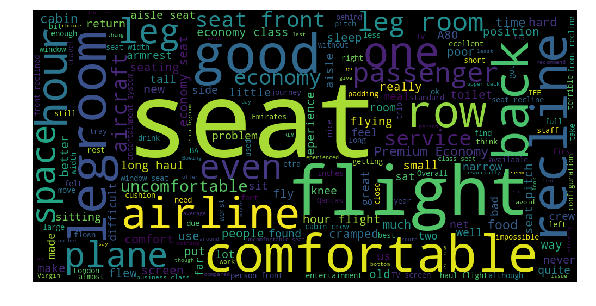

In [33]:
#Creating word cloud
#wordcloud takes a list of words
from wordcloud import WordCloud

words_all = []
for item in tokens_no_stopwords:
    words_all = words_all+item
wordcl = WordCloud(width = 1000,  height = 500).generate(" ".join(words_all))
plt.figure(figsize = (10,5))
plt.imshow(wordcl)
plt.axis("off")
plt.show()
#frequent words are seat leg room good

In [35]:
#Stemming and Lemmetization 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.corpus import sentiwordnet as swn


In [36]:
pos_tokens= [nltk.pos_tag(token) for token in tokens_no_stopwords]
print(pos_tokens)

[[('LHR', 'NNP'), ('Larnaca', 'NNP'), ('return', 'VBP'), ('Plane', 'NNP'), ('clean', 'JJ'), ('good', 'JJ'), ('condition', 'NN'), ('Drinks', 'NNP'), ('served', 'VBD'), ('throughout', 'IN'), ('flights', 'NNS'), ('Food', 'NNP'), ('good', 'NN'), ('Would', 'NNP'), ('definitely', 'RB'), ('hesitate', 'VBP'), ('use', 'JJ'), ('airline', 'NN'), ('European', 'JJ'), ('trips', 'NNS')], [('For', 'IN'), ('short', 'JJ'), ('haul', 'NN'), ('airline', 'NN'), ('seats', 'NNS'), ('good', 'JJ'), ('I', 'PRP'), ('find', 'VBP'), ('seats', 'JJ'), ('comfortable', 'JJ'), ('plenty', 'NN'), ('leg', 'NN'), ('room', 'NN')], [('The', 'DT'), ('seats', 'NNS'), ('bit', 'VBP'), ('tight', 'JJ'), ('bearable', 'JJ'), ('If', 'IN'), ('courteous', 'JJ'), ('others', 'NNS'), ('courteous', 'JJ'), ('Everyone', 'NNP'), ('seat', 'NN'), ('ask', 'NN'), ('neighbor', 'NN'), ('front', 'VBD'), ('back', 'RB'), ('issues', 'NNS'), ('come', 'VBP'), ('good', 'JJ')], [('Appeared', 'NNP'), ('new', 'JJ'), ('Good', 'NNP'), ('PTV', 'NNP'), ('entertai

In [43]:
lemmatizer = WordNetLemmatizer()
recommended = []
def wordnet_pos(nltk_pos) : 
    if nltk_pos.startswith('J'):
        return wn.ADJ
    elif nltk_pos.startswith('V'):
        return wn.VERB
    elif nltk_pos.startswith('N'):
        return wn.NOUN
    elif nltk_pos.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN
    
for item in pos_tokens:
    sentiment = 0.0
    for word,tag in item :
        lemma = lemmatizer.lemmatize(word,wordnet_pos(tag))
        if not lemma:
            continue
        else:
            synsets = wn.synsets(lemma , wordnet_pos(tag))
            
        if not synsets:
            continue
            
        synset = synsets[0]    
        #print(synset.name())
        
        swn_synset = swn.senti_synset(synset.name())
        
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        
    if sentiment<=0:
        sentiment = 0 
    else :
        sentiment = 1
        
    recommended.append(sentiment)
print(recommended)

[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 

In [44]:
#Accuracy 

from sklearn.metrics import accuracy_score
accuracy_score(y,recommended)

0.6860095389507154